In [30]:
# Setup

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import scipy
%matplotlib inline
plt.rcParams['figure.figsize'] =  (12,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Folder containing CSV files
import h5py
path = '/content/drive/MyDrive/Econ_project/archive-2/FullData.h5'
with h5py.File(path, 'r') as f:
    print("Available keys:", list(f.keys()))

Mounted at /content/drive
Available keys: ['AARTIIND__EQ__NSE__NSE__MINUTE', 'ABCAPITAL__EQ__NSE__NSE__MINUTE', 'ABFRL__EQ__NSE__NSE__MINUTE', 'ADANIENT__EQ__NSE__NSE__MINUTE', 'ADANIGAS__EQ__NSE__NSE__MINUTE', 'ADANIPORTS__EQ__NSE__NSE__MINUTE', 'AJANTPHARM__EQ__NSE__NSE__MINUTE', 'AMARAJABAT__EQ__NSE__NSE__MINUTE', 'APLLTD__EQ__NSE__NSE__MINUTE', 'APOLLOHOSP__EQ__NSE__NSE__MINUTE', 'APOLLOTYRE__EQ__NSE__NSE__MINUTE', 'ASHOKLEY__EQ__NSE__NSE__MINUTE', 'ASIANPAINT__EQ__NSE__NSE__MINUTE', 'AUBANK__EQ__NSE__NSE__MINUTE', 'AXISBANK__EQ__NSE__NSE__MINUTE', 'BAJAJFINSV__EQ__NSE__NSE__MINUTE', 'BAJAJ_AUTO__EQ__NSE__NSE__MINUTE', 'BAJFINANCE__EQ__NSE__NSE__MINUTE', 'BALKRISIND__EQ__NSE__NSE__MINUTE', 'BANKINDIA__EQ__NSE__NSE__MINUTE', 'BATAINDIA__EQ__NSE__NSE__MINUTE', 'BBTC__EQ__NSE__NSE__MINUTE', 'BEL__EQ__NSE__NSE__MINUTE', 'BHARATFORG__EQ__NSE__NSE__MINUTE', 'BHARTIARTL__EQ__NSE__NSE__MINUTE', 'BHEL__EQ__NSE__NSE__MINUTE', 'BPCL__EQ__NSE__NSE__MINUTE', 'BRITANNIA__EQ__NSE__NSE__MINUTE', '

In [3]:
info = pd.read_hdf(path, key='master')
info.head()

,tradingsymbol,name,instrument_type,segment,exchange,data_type,key,from,to
0,NIFTY 50,NIFTY 50,EQ,INDICES,NSE,minute,NIFTY_50__EQ__INDICES__NSE__MINUTE,2017-01-01 00:00:00+05:30,2021-01-01 23:59:59+05:30
1,NIFTY 100,NIFTY 100,EQ,INDICES,NSE,minute,NIFTY_100__EQ__INDICES__NSE__MINUTE,2017-01-01 00:00:00+05:30,2021-01-01 23:59:59+05:30
2,NIFTY 500,NIFTY 500,EQ,INDICES,NSE,minute,NIFTY_500__EQ__INDICES__NSE__MINUTE,2019-07-02 00:00:00+05:30,2021-01-01 23:59:59+05:30
3,NIFTY AUTO,NIFTY AUTO,EQ,INDICES,NSE,minute,NIFTY_AUTO__EQ__INDICES__NSE__MINUTE,2017-01-01 00:00:00+05:30,2021-01-01 23:59:59+05:30
4,NIFTY BANK,NIFTY BANK,EQ,INDICES,NSE,minute,NIFTY_BANK__EQ__INDICES__NSE__MINUTE,2017-01-01 00:00:00+05:30,2021-01-01 23:59:59+05:30


In [4]:
df = pd.read_hdf(path, key='NIFTY_100__EQ__INDICES__NSE__MINUTE')
df.dropna(inplace=True)
df = df.reset_index()
df.head()

,timestamp,open,high,low,close,volume
0,2017-01-02 09:15:00+05:30,8409.60,8409.75,8390.75,8391.10,0.0
1,2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.40,8391.15,0.0
2,2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.60,8373.60,0.0
3,2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.90,8376.75,0.0
4,2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.60,8373.70,0.0


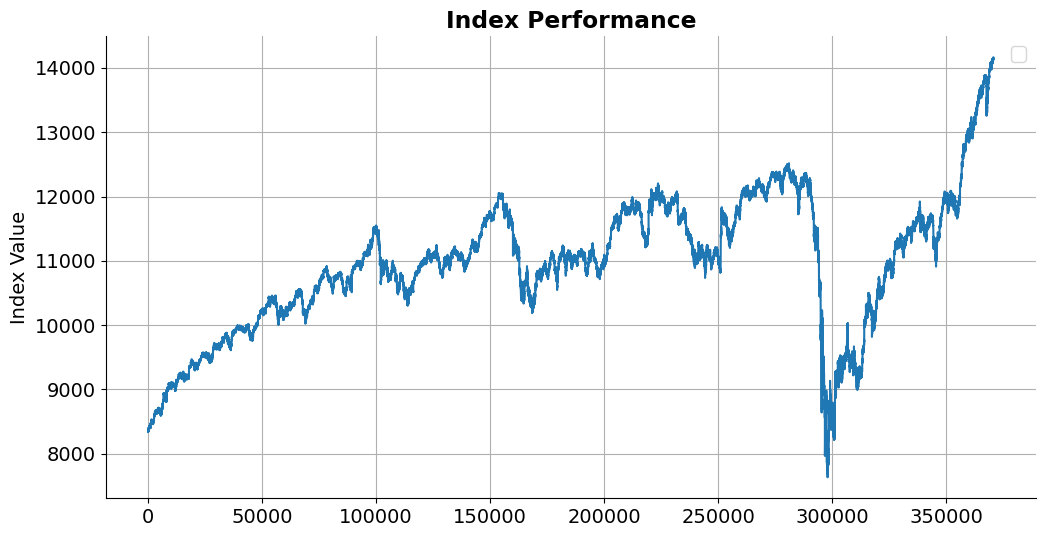

In [13]:
plt.plot(df["close"])
plt.ylabel("Index Value")
plt.title("Index Performance", fontweight="bold")
plt.legend()
plt.grid()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                 1.864e+05
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:50:46   Log-Likelihood:            -3.0246e+06
No. Observations:              370677   AIC:                         6.049e+06
Df Residuals:                  370675   BIC:                         6.049e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9924.4518      2.779   3570.773      0.0

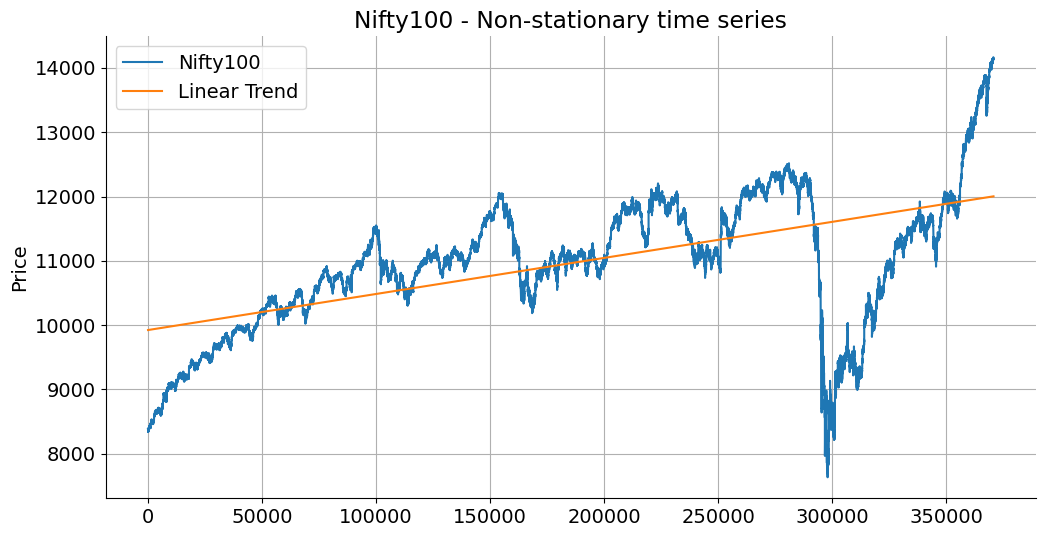

In [11]:
#feed X such that it contains a dataframe with out predictor variables.
X = range(0,len(df['close']))
y = df['close']
X = sm.add_constant(X) # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)
to_plot = pd.DataFrame({'Nifty100':df['close'],'Linear Trend':predictions})
to_plot.plot(ylabel = 'Price', title = 'Nifty100 - Non-stationary time series')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
df['log_return'] = np.log(df['close']).diff()
df.dropna(inplace=True)
df.head()

,timestamp,open,high,low,close,volume,log_return
1,2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.4,8391.15,0.0,0.000006
2,2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.6,8373.60,0.0,-0.002094
3,2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.9,8376.75,0.0,0.000376
4,2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.6,8373.70,0.0,-0.000364
5,2017-01-02 09:20:00+05:30,8373.65,8373.65,8365.5,8365.60,0.0,-0.000968


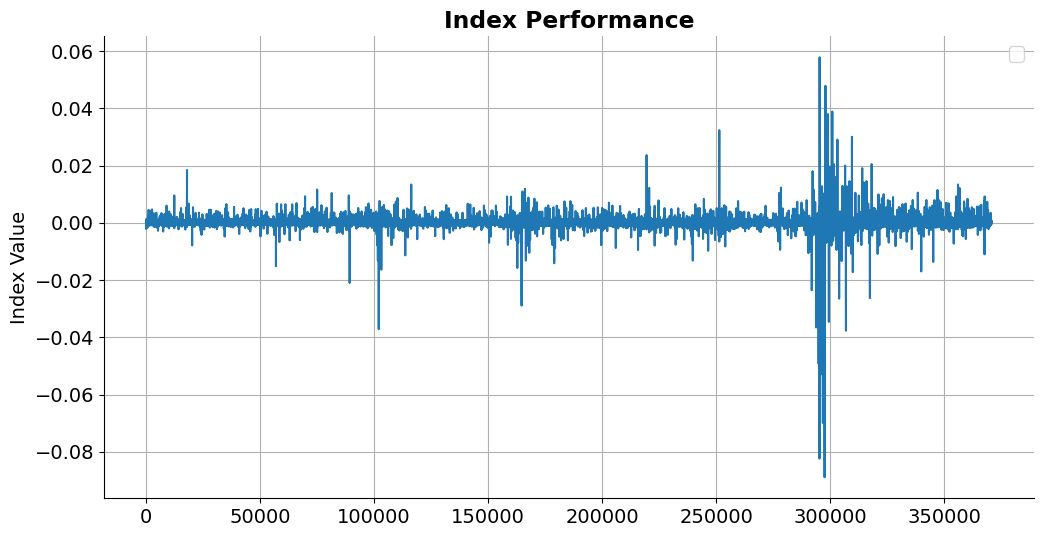

In [14]:
plt.plot(df["log_return"])
plt.ylabel("Index Value")
plt.title("Index Performance", fontweight="bold")
plt.legend()
plt.grid()
plt.show()

In [23]:
np.var(df['log_return'].iloc[1:]) #variance
y = abs(df['log_return'].iloc[1:])
model = ARIMA(y, order=(2,0,1)) #ARMA(2,1) model
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:               370675
Model:                 ARIMA(2, 0, 1)   Log Likelihood             2287135.487
Date:                Mon, 07 Apr 2025   AIC                       -4574260.973
Time:                        17:06:37   BIC                       -4574206.858
Sample:                             0   HQIC                      -4574245.461
                             - 370675                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003   4.12e-06     63.102      0.000       0.000       0.000
ar.L1          0.9321   6.85e-05   1.36e+04      0.000       0.932       0.932
ar.L2          0.0058      0.000     33.415      0.0

In [24]:
fitted_values = model_fit.fittedvalues
print(fitted_values)

2         0.000260
3         0.000748
4         0.000646
5         0.000568
6         0.000615
            ...   
370672    0.000272
370673    0.000267
370674    0.000235
370675    0.000205
370676    0.000209
Length: 370675, dtype: float64


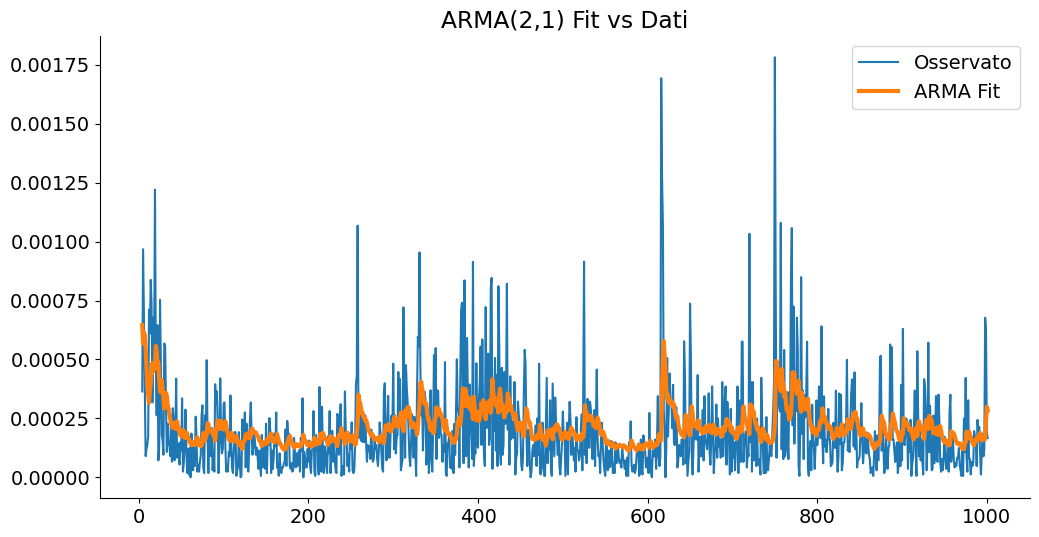

In [38]:
plt.plot(y[2:1000], label='Osservato')
plt.plot(fitted_values[2:1000], label='ARMA Fit', linestyle='-',linewidth=3)
plt.legend()
plt.title('ARMA(2,1) Fit vs Dati')
plt.show()


In [26]:
rmse = np.sqrt(np.mean((y - fitted_values)**2))
print("RMSE:", rmse)

RMSE: 0.0005059220778641518
